In [1]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import importlib
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import logging

#%load_ext line_profiler

ModuleNotFoundError: No module named 'pandas'

: 

In [ ]:
from model.eGauss_plus import eGAUSSp

In [ ]:
# Load the dataset
file_path = 'Datasets/creditcard.csv'
data = pd.read_csv(file_path)

# Separate features and target
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Scaling the 'Time' and 'Amount' features
scaler = StandardScaler()
X[:, [0, -1]] = scaler.fit_transform(X[:, [0, -1]])  # Assuming 'Time' is the first and 'Amount' is the last feature in the DataFrame

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create TensorDatasets for both training and testing data
train_dataset = TensorDataset(X_train, y_train.unsqueeze(1))
test_dataset = TensorDataset(X_test, y_test.unsqueeze(1))

# Create DataLoaders for both datasets
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


In [ ]:

# Create an instance of the eGAUSSp model
num_sigma = 2
kappa_join = 0.9
S_0 = 1e-10
c_max = 10
device = torch.device("cpu")
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = eGAUSSp(feature_dim=2, num_classes=3, N_max=1, num_sigma=num_sigma, kappa_join=kappa_join, S_0=S_0, c_max=c_max, device=device)

z_1 = np.random.randn(2, 200)
z_2_top = np.random.randn(1, 100)
z_2 = np.vstack((z_2_top, -z_2_top + (8 + 0.85 * np.random.randn(1, 100))))
z_3_top = -1.5 + 0.5 * np.random.randn(1, 50)
z_3 = np.vstack((z_3_top, -z_3_top + (4 + 0.5 * np.random.randn(1, 50))))

labels_1 = 0*np.ones((z_1.shape[1],), dtype=np.int32)  # Label 0 for z_1 cluster
labels_2 = 1*np.ones((z_2.shape[1],), dtype=np.int32)  # Label 1 for z_2 cluster
labels_3 = 2*np.ones((z_3.shape[1],), dtype=np.int32)  # Label 2 for z_3 cluster

# Concatenate the data and labels
z = np.hstack((z_1, z_2, z_3))
labels = np.hstack((labels_1, labels_2, labels_3))

# Shuffle the data and labels in the same order
indices = np.random.permutation(z.shape[1])
z = z[:, indices]
labels = labels[indices]

# Convert the shuffled data to a PyTorch tensor
sample_data = torch.tensor(z.transpose(), dtype=torch.float32).to(device)
sample_labels = torch.tensor(labels, dtype=torch.float32).to(device)



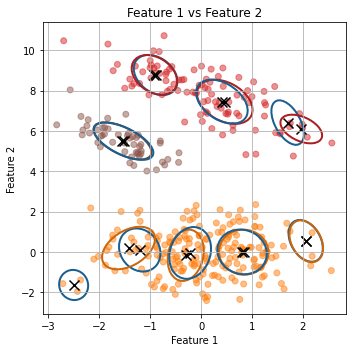

UsageError: Could not find module model.mathematician._compute_covariance_inverse.
AttributeError: 'MathOps' object has no attribute '_compute_covariance_inverse'


In [ ]:
from utils.utils_plots import plot_first_feature

def process_sample_data():
    for z, label in zip(sample_data, sample_labels):
        model.forward(z, label)
        
        label = torch.tensor(-1, dtype=torch.int64, device=device)
        model.forward(z, label)

    # Plot the samples
    plot_first_feature(sample_data, sample_labels, model=model, num_sigma=num_sigma, N_max=2)   
        
process_sample_data()

%load_ext line_profiler
%lprun  -f model.forward \
-f model.merging_mech.compute_kappa_matrix \
-f model.merging_mech.merging_mechanism \
-f model.merging_mech.compute_cluster_parameters \
-f model.merging_mech.plot_cluster \
-f model.merging_mech.perform_merge \
-f model.clustering.increment_or_add_cluster \
-f model.clustering._increment_cluster \
-f model.clustering._add_new_cluster \
-f model.mathematician._compute_covariance_inverse \
-f model.mathematician.compute_activation \
-f model.consequence.defuzzify\
process_sample_data()

In [ ]:
from sklearn import datasets
import torch
import numpy as np

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Normalize features (optional, depending on your model's requirements)

# Shuffle the data and labels in the same order
indices = np.random.permutation(len(X))
X, y = X[indices], y[indices]

# Convert the data to PyTorch tensors
sample_data = torch.tensor(X, dtype=torch.float32).to(device)
sample_labels = torch.tensor(y, dtype=torch.int64)  # or just use y if labels as numpy array are okay

# Assuming eGAUSSp is your model class
# Create an instance of the eGAUSSp model
num_sigma = 2
kappa_join = 0.8
S_0 = 1e-10
c_max = 10
feature_dim = 4

device = torch.device("cpu")

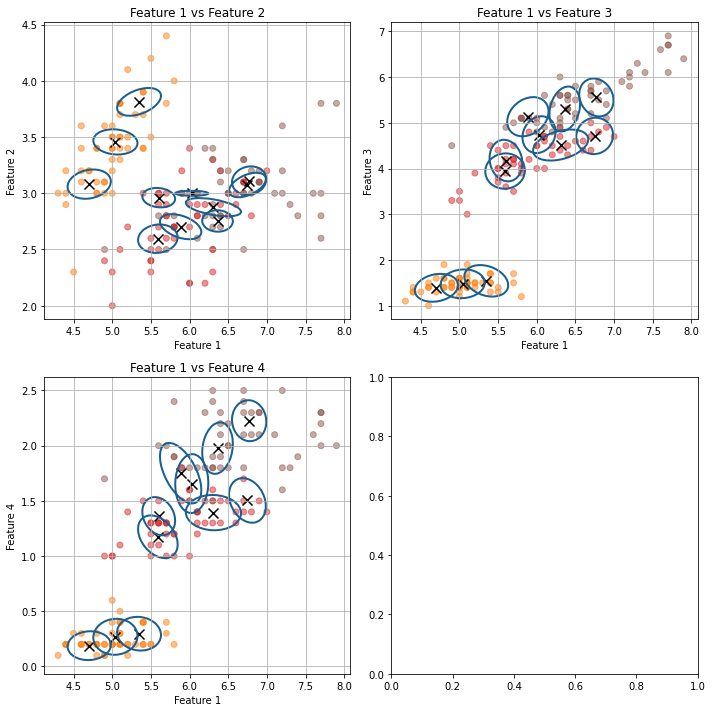

In [ ]:
import utils.utils_train
importlib.reload(utils.utils_train)
from utils.utils_train import train_supervised, train_unsupervised

#Train supervised
super_model = eGAUSSp(feature_dim=feature_dim, num_classes=3, N_max=1, num_sigma=num_sigma, kappa_join=kappa_join, S_0=S_0, c_max=c_max, device=device)
train_supervised(super_model, (sample_data, sample_labels))
plot_first_feature(sample_data, sample_labels, model=super_model, num_sigma=num_sigma, N_max=feature_dim)   
    
#Train unsupervised
unsuper_model = eGAUSSp(feature_dim=feature_dim, num_classes=3, N_max=1, num_sigma=num_sigma, kappa_join=kappa_join, S_0=S_0, c_max=c_max, device=device)
train_unsupervised(unsuper_model, (sample_data, sample_labels))
plot_first_feature(sample_data, sample_labels, model=unsuper_model, num_sigma=num_sigma, N_max=feature_dim)   


Client 1: {1: 4, 2: 6}
Client 2: {0: 14, 2: 7}
Client 3: {0: 9, 1: 9, 2: 5}
Client 4: {0: 7, 1: 5, 2: 5}
Client 5: {0: 5, 1: 8, 2: 4}
Client 6: {0: 6, 1: 3, 2: 8}
Test Set: {0: 9, 1: 21, 2: 15}

Combined Number of Samples per Class:
Class 0: 50 samples
Class 1: 50 samples
Class 2: 50 samples

Total Number of Samples Across All Datasets: 150


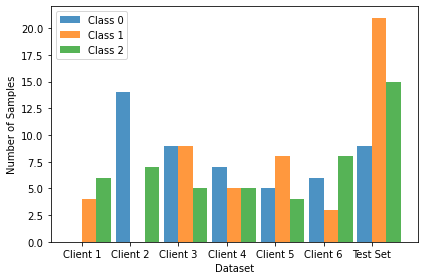

In [ ]:
from utils.utils_dataset import prepare_non_iid_dataset, plot_dataset_split, display_dataset_split
  
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

num_clients = 6
client_data, X_test, y_test, X_all, y_all = prepare_non_iid_dataset(X, y, num_clients)

display_dataset_split(client_data, y_test)
plot_dataset_split(client_data, y_test)

In [ ]:

# Model parameters
local_model_params = {
    "feature_dim": 4,
    "num_classes": 3,
    "N_max": 1,
    "num_sigma": 2,
    "kappa_join": 1.5,
    "S_0": 1e-10,
    "c_max": 2,
    "device": torch.device("cpu")
}
federated_model_params = {
    "feature_dim": 4,
    "num_classes": 3,
    "N_max": 1,
    "num_sigma": 2,
    "kappa_join": 1.5 ,
    "S_0": 1e-10,
    "c_max": 2,
    "device": torch.device("cpu")
}

# Initialize a model for each client
local_models = [eGAUSSp(**local_model_params) for _ in range(num_clients)]
federated_model = eGAUSSp(**federated_model_params)

  # Assuming models and client_data are already defined
for client_idx, client_model in enumerate(local_models):
    print(f"Training model for client {client_idx + 1}")
    train_supervised(client_model, client_data[client_idx])

Training model for client 1
Evolving has been enabled.
Training model for client 2
Evolving has been enabled.
Training model for client 3
Evolving has been enabled.
Training model for client 4
Evolving has been enabled.
Training model for client 5
Evolving has been enabled.
Training model for client 6
Evolving has been enabled.


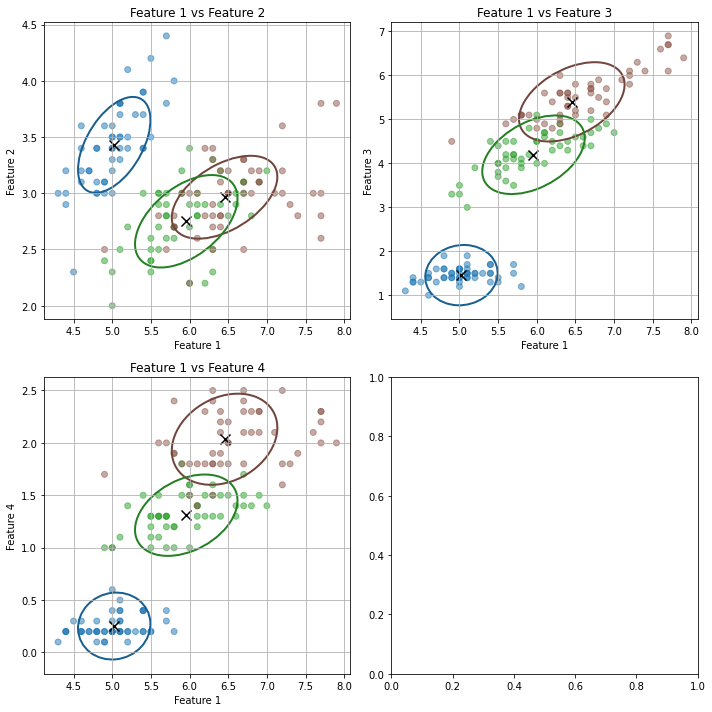


Testing federated model
Evolving has been disabled.
Test Accuracy: 0.9333333333333333, Precision: 0.935, Recall: 0.9333333333333333, F1 Score: 0.9335955940204562
Evolving has been disabled.
Test Accuracy: 0.9466666666666667, Precision: 0.9507575757575758, Recall: 0.9466666666666667, F1 Score: 0.9464739729693563

Testing model for client 1
Evolving has been disabled.
Test Accuracy: 0.6666666666666666, Precision: 0.7242424242424244, Recall: 0.6666666666666666, F1 Score: 0.6141462392625183
Evolving has been disabled.
Test Accuracy: 0.5533333333333333, Precision: 0.7166666666666667, Recall: 0.5533333333333333, F1 Score: 0.4616748843787027

Testing model for client 2
Evolving has been disabled.
Test Accuracy: 0.5333333333333333, Precision: 0.7681818181818182, Recall: 0.5333333333333333, F1 Score: 0.3797619047619048
Evolving has been disabled.
Test Accuracy: 0.66, Precision: 0.7877565982404692, Recall: 0.66, F1 Score: 0.5343340234644582

Testing model for client 3
Evolving has been disabled

In [ ]:
  
import utils.utils_train
importlib.reload(utils.utils_train)
from utils.utils_train import train_supervised, test_model
  
for client_idx, client_model in enumerate(local_models):
        print(f"Merging client {client_idx + 1}")
        federated_model.federal_agent.merge_model(client_model)

federated_model.federal_agent.federated_merging()

plot_first_feature(X_all, y_all, model=federated_model, num_sigma=2, N_max=1)   
print(f"\nTesting federated model")   

test_model(federated_model, X_test, y_test)
test_model(client_model, X_all, y_all)
        
# Testing each client's model on the global test dataset
for client_idx, client_model in enumerate(local_models):
    print(f"\nTesting model for client {client_idx + 1}")
    test_model(client_model, X_test, y_test)
    test_model(client_model, X_all, y_all)


In [ ]:
feature_dim = 30  # or whatever the correct value is
N_max = feature_dim # Maximum number of clusters, provide an appropriate value
num_sigma = 2
kappa_join = 1.5 # Joining parameter, provide an appropriate value
S_0 = 1e-10 # Initial potential value, provide an appropriate value
c_max = 10
num_classes = 2
from sklearn.utils import shuffle

# Define the device
device = torch.device("cpu")# Split the data into fraud and non-fraud
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")# Split the data into fraud and non-fraud

model = eGAUSSp(feature_dim=feature_dim, num_classes=num_classes, N_max=N_max, num_sigma=num_sigma, kappa_join=kappa_join, S_0=S_0, c_max=c_max, device=device)
model.overseer.toggle_debugging()

fraud_indices = data[data['Class'] == 1].index
non_fraud_indices = data[data['Class'] == 0].index

# Randomly select an equal number of non-fraud indices
random_non_fraud_indices = np.random.choice(non_fraud_indices, len(fraud_indices), replace=False)

# Concatenate fraud and non-fraud indices
subset_indices = np.concatenate([fraud_indices, random_non_fraud_indices])

# Shuffle the subset indices to mix fraud and non-fraud transactions
subset_indices = shuffle(subset_indices, random_state=42)

# Create the balanced subset
subset_data = data.loc[subset_indices]

# Now follow the same steps as before to create tensors and a DataLoader
features = subset_data.drop('Class', axis=1).values
labels = subset_data['Class'].values

# Convert features and labels to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.int64)

# Create a TensorDataset and DataLoader
dataset = TensorDataset(features_tensor, labels_tensor.unsqueeze(1)) # Unsqueezing to add the batch dimension
dataloader = DataLoader(dataset, batch_size=1, shuffle=True, pin_memory=True) # Shuffle for training

# Initialize the model (assuming 'eGAUSSp' is defined)
feature_dim = features.shape[1]  # Number of features

model.overseer.toggle_debugging()


Debugging has been enabled.
Debugging has been disabled.


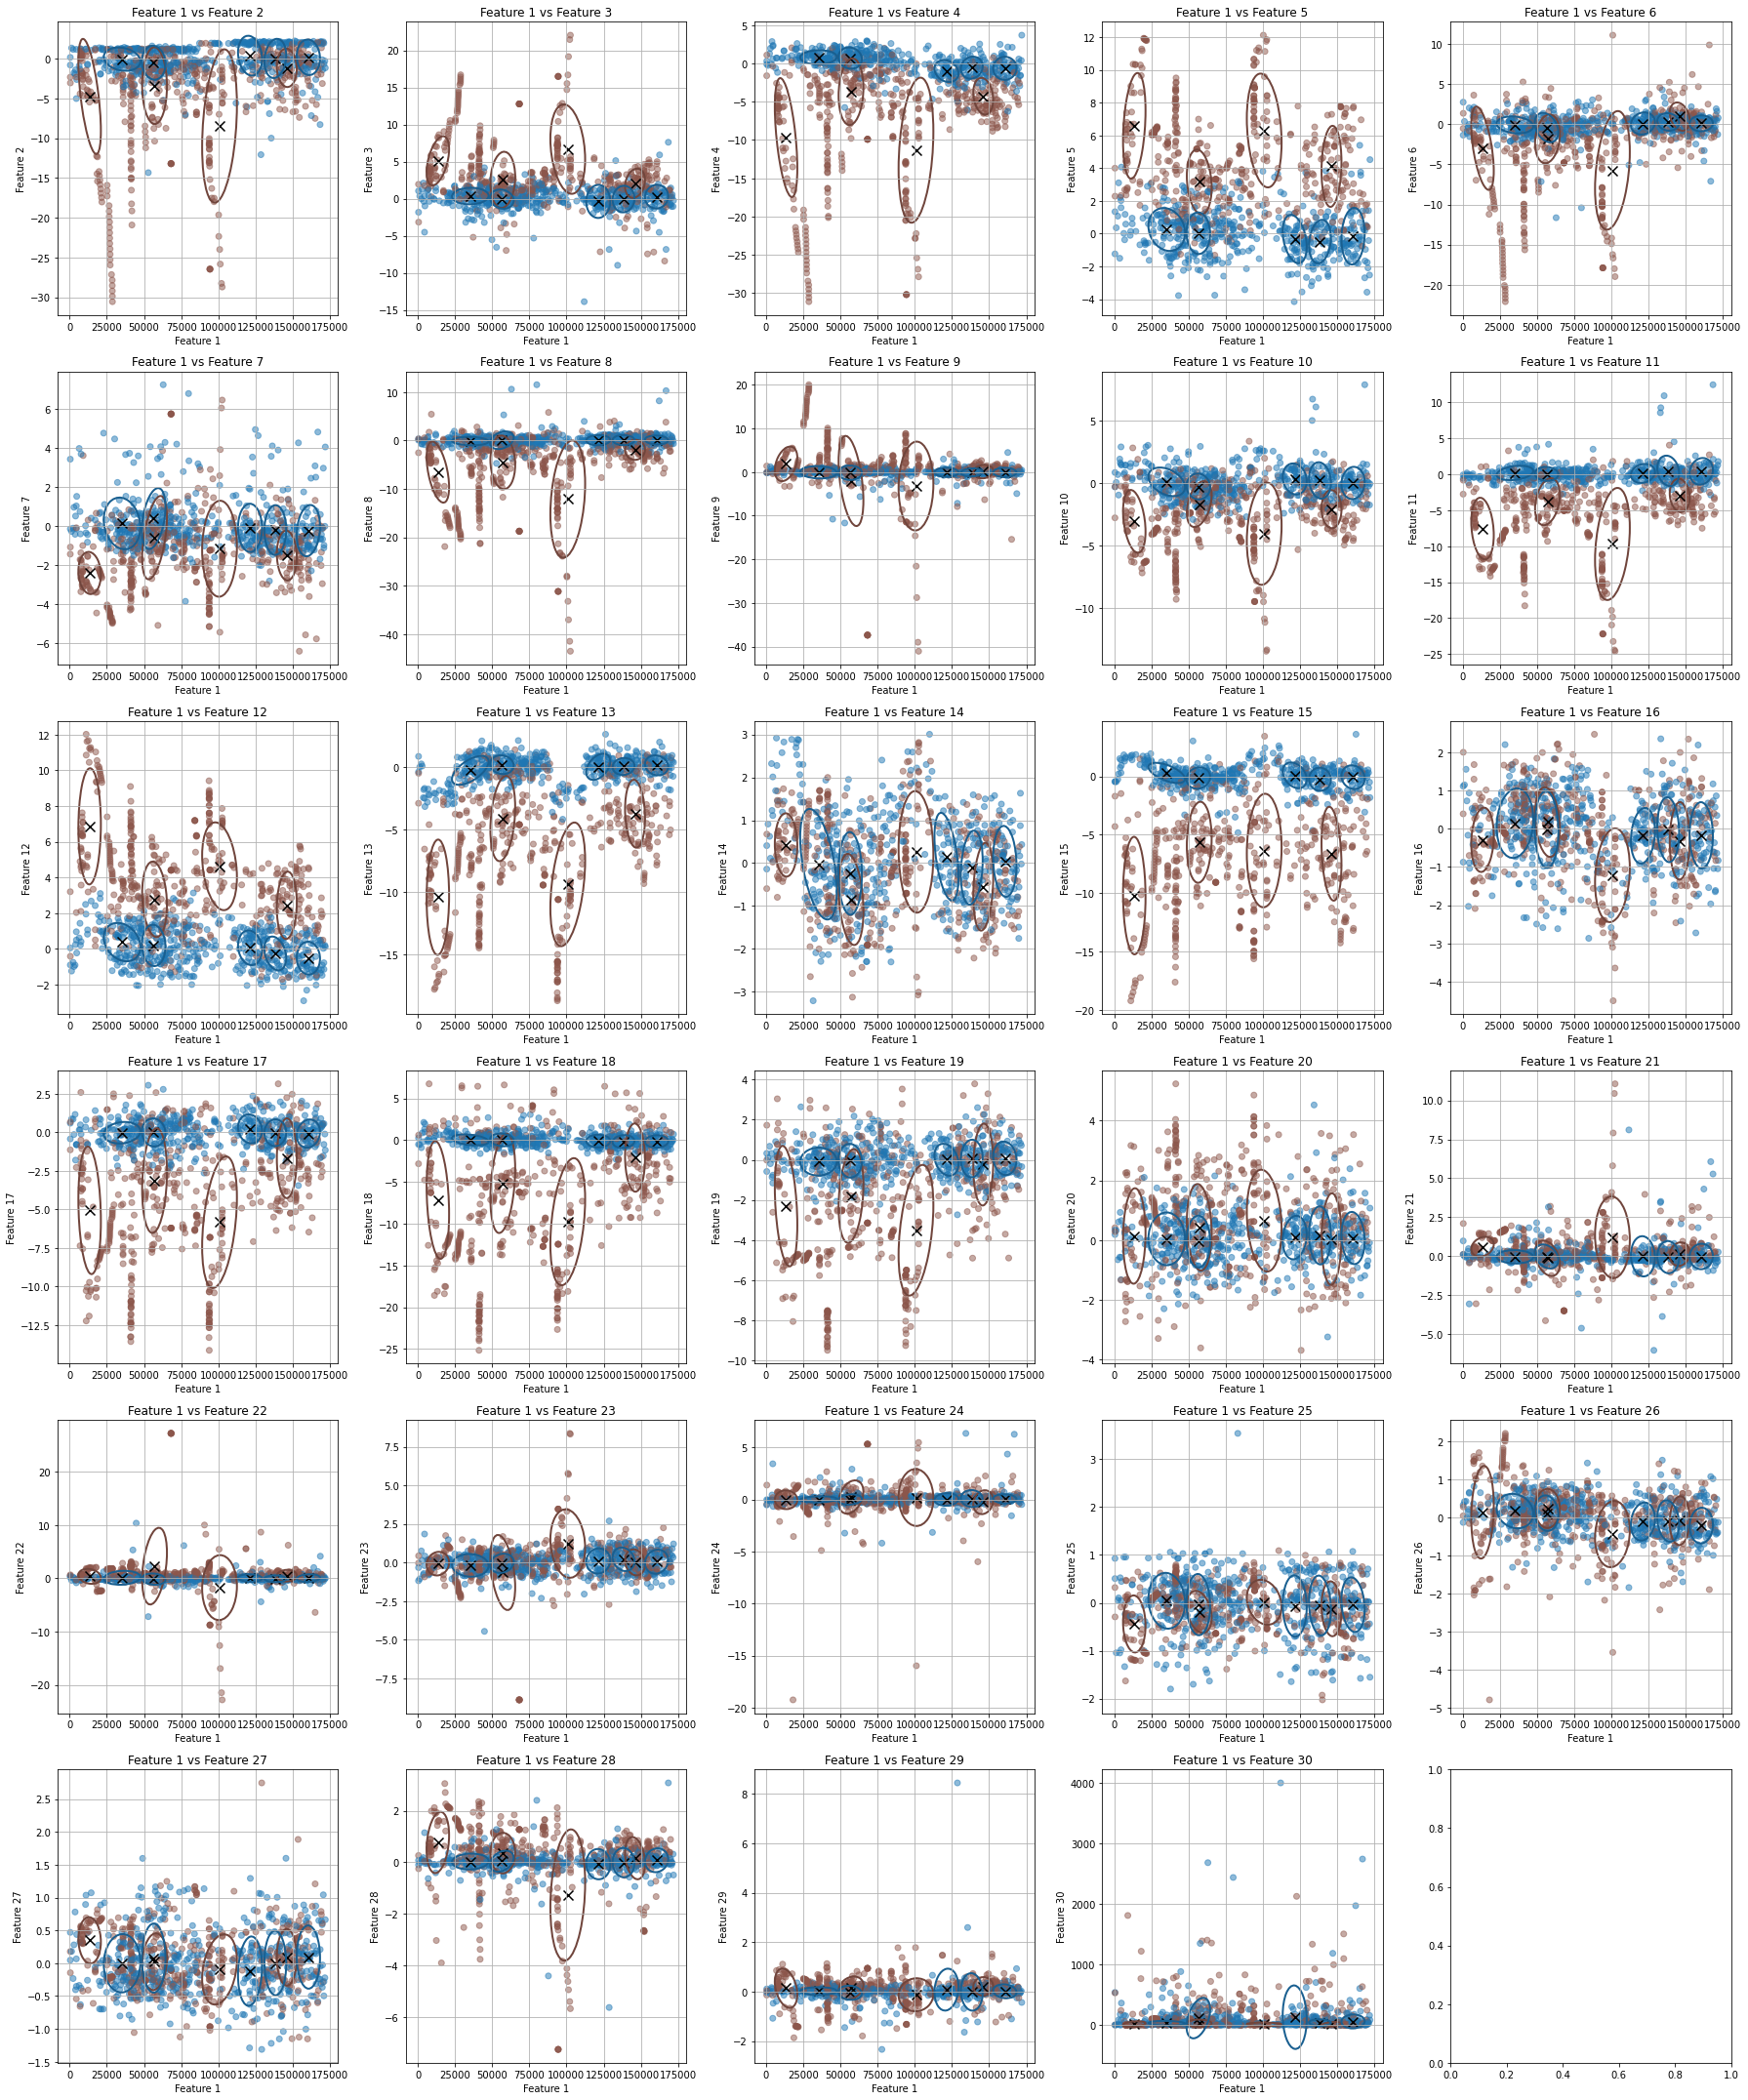

Timer unit: 1e-07 s

Total time: 0 s
File: c:\Users\mihao\Anaconda3\lib\site-packages\line_profiler\line_profiler.py
Function: wrapper at line 146

Line #      Hits         Time  Per Hit   % Time  Line Contents
   146                                                   @functools.wraps(func)
   147                                                   def wrapper(*args, **kwds):
   148                                                       self.enable_by_count()
   149                                                       try:
   150                                                           result = func(*args, **kwds)
   151                                                       finally:
   152                                                           self.disable_by_count()
   153                                                       return result

In [ ]:

def training_loop(dataloader, model):
    viewed_samples = []
    viewed_labels = []

    for idx, (point, label) in enumerate(dataloader):
        point, label = point.to(device).squeeze(0), label.to(device).squeeze(0)
        model(point, label)

        # Collect the viewed samples and labels
        viewed_samples.append(point)
        viewed_labels.append(label)

        if (idx + 1) % 1000 == 0 or (idx+1) == len(dataloader):  # Plot every 100 samples
            
            print(f"** Processed {idx + 1} points. **")
            print(f"Number of clusters so far: {model.c}")

        if (idx + 1) % 10000 == 0 or (idx+1) == len(dataloader):  # Plot every 100 samples
            
            # Convert the collected samples and labels to a NumPy array
            samples_np = torch.vstack(viewed_samples)
            labels_np = torch.vstack(viewed_labels).flatten()

            # Plot the samples
            plot_first_feature(data=samples_np, labels=labels_np, model=model, num_sigma=num_sigma, N_max=feature_dim)

# Run the training loop
#training_loop(dataloader, model)

%load_ext line_profiler
%lprun  -f model.forward \
-f model.merging_mech.compute_kappa_matrix \
-f model.merging_mech.merging_mechanism \
-f model.merging_mech.compute_cluster_parameters \
-f model.merging_mech.plot_cluster \
-f model.merging_mech.perform_merge \
-f model.clustering.increment_or_add_cluster \
-f model.clustering._increment_cluster \
-f model.clustering._add_new_cluster \
-f model.mathematician.compute_activation \
-f model.consequence.defuzzify\
training_loop(dataloader, model)


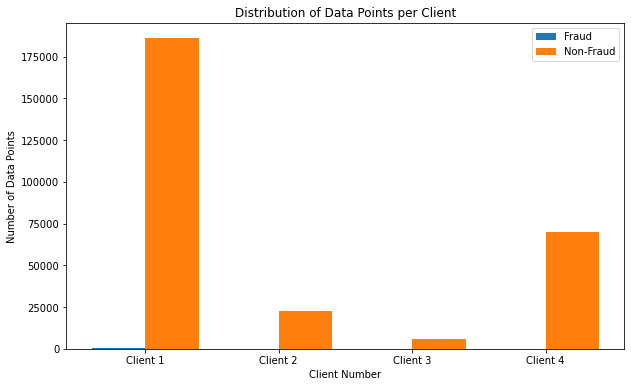

Client 1 has 186393 total data points (Fraud: 321, Non-Fraud: 186072)
Client 2 has 22544 total data points (Fraud: 38, Non-Fraud: 22506)
Client 3 has 6008 total data points (Fraud: 10, Non-Fraud: 5998)
Client 4 has 69859 total data points (Fraud: 120, Non-Fraud: 69739)


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.utils import shuffle

# Define the number of clients dynamically
num_clients = 4  # or any other number

# Determine the total amount of data from the dataset
total_data = len(data)  # Total number of data points in the dataset

# Total number of fraud and non-fraud cases
total_frauds = sum(data['Class'] == 1)
total_non_frauds = total_data - total_frauds

# Generate dynamic data amounts for each client
data_amount = np.random.randint(10, total_data, num_clients)
data_amount = (data_amount / data_amount.sum()) * total_data  # Normalize to sum to total_data
data_amount = data_amount.astype(int)
data_amount[-1] = total_data - data_amount[:-1].sum()  # Adjust the last element

# Separate fraud and non-fraud indices
fraud_indices = data[data['Class'] == 1].index.tolist()
non_fraud_indices = data[data['Class'] == 0].index.tolist()

# Shuffle indices
np.random.shuffle(fraud_indices)
np.random.shuffle(non_fraud_indices)

# Partitioning data
partitions = {i: pd.DataFrame() for i in range(num_clients)}
fraud_counter = non_fraud_counter = 0

for i in range(num_clients):
    num_frauds_client = int((data_amount[i] / total_data) * total_frauds)
    num_non_frauds_client = data_amount[i] - num_frauds_client

    # Select indices for this client
    client_fraud_indices = fraud_indices[fraud_counter:fraud_counter + num_frauds_client]
    client_non_fraud_indices = non_fraud_indices[non_fraud_counter:non_fraud_counter + num_non_frauds_client]

    fraud_counter += num_frauds_client
    non_fraud_counter += num_non_frauds_client

    subset_indices = np.concatenate([client_fraud_indices, client_non_fraud_indices])
    subset_indices = shuffle(subset_indices, random_state=42)

    partitions[i] = data.loc[subset_indices]

# Convert partitions to PyTorch datasets
datasets = {}
for i in range(num_clients):
    features = torch.tensor(partitions[i].drop('Class', axis=1).values, dtype=torch.float32)
    labels = torch.tensor(partitions[i]['Class'].values, dtype=torch.int64)
    datasets[i] = TensorDataset(features, labels.unsqueeze(1))

# Initialize models for each client
local_models = {i: eGAUSSp(feature_dim=30, num_classes=2, N_max=30, num_sigma=2, kappa_join=1.5, S_0=1e-10, c_max=4, device=device) for i in range(num_clients)}

import matplotlib.pyplot as plt

# Assuming partitions is your dictionary of data for each client
fraud_counts = []
non_fraud_counts = []
total_data_counts = []

for i in range(num_clients):
    fraud_count = partitions[i][partitions[i]['Class'] == 1].shape[0]
    non_fraud_count = partitions[i][partitions[i]['Class'] == 0].shape[0]

    fraud_counts.append(fraud_count)
    non_fraud_counts.append(non_fraud_count)
    total_data_counts.append(fraud_count + non_fraud_count)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for fraud and non-fraud counts
plt.bar(np.arange(num_clients) - 0.2, fraud_counts, width=0.4, label='Fraud')
plt.bar(np.arange(num_clients) + 0.2, non_fraud_counts, width=0.4, label='Non-Fraud')

plt.xlabel('Client Number')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points per Client')
plt.xticks(np.arange(num_clients), [f'Client {i+1}' for i in range(num_clients)])
plt.legend()

plt.show()

# Displaying total data counts
for i in range(num_clients):
    print(f'Client {i+1} has {total_data_counts[i]} total data points (Fraud: {fraud_counts[i]}, Non-Fraud: {non_fraud_counts[i]})')


In [ ]:
import threading

def training_loop(dataloader, model, device, num_sigma, N_max):
    viewed_samples = []
    viewed_labels = []

    for idx, (point, label) in enumerate(dataloader):
        point, label = point.to(device).squeeze(0), label.to(device).squeeze(0)
        model(point, label)  # Assuming model(point, label) updates the model

        # Collect the viewed samples and labels
        viewed_samples.append(point.cpu())
        viewed_labels.append(label.cpu())

        if (idx + 1) % 100 == 0 or (idx + 1) == len(dataloader):
            print(f"** Processed {idx + 1} points. **")
            print(f"Number of clusters so far: {model.c}")

        if (idx + 1) % 10000 == 0 or (idx + 1) == len(dataloader):
            # Convert the collected samples and labels to a NumPy array
            samples_np = torch.vstack(viewed_samples).numpy()
            labels_np = torch.hstack(viewed_labels).numpy()

            # Plot the samples (assuming you have a defined function plot_pairwise_against_first_feature)
            plot_first_feature(data=samples_np, labels=labels_np, model=model, num_sigma=num_sigma, N_max=N_max)


def train_model_thread(datasets, local_model, device, num_sigma, N_max):
    print(f"Starting training for local model {i}")

    # Create a DataLoader for the local dataset
    local_dataloader = DataLoader(datasets, batch_size=1, shuffle=True)  # Adjust batch_size as needed

    # Run the training loop for the local model
    training_loop(local_dataloader, local_model, device, num_sigma, N_max)

    print(f"Finished training for local model {i}")

threads = []
for i, local_model in local_models.items():
    thread = threading.Thread(target=train_model_thread, args=(datasets[i], local_model, device, num_sigma, N_max))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()


Starting training for local model 0
Starting training for local model 1
Starting training for local model 2
Starting training for local model 3
** Processed 100 points. **
Number of clusters so far: 11
** Processed 100 points. **
Number of clusters so far: 11
** Processed 100 points. **
Number of clusters so far: 15
** Processed 100 points. **
Number of clusters so far: 12
** Processed 200 points. **
Number of clusters so far: 11
** Processed 200 points. **
Number of clusters so far: 18
** Processed 200 points. **
Number of clusters so far: 16
** Processed 200 points. **
Number of clusters so far: 18
** Processed 300 points. **
Number of clusters so far: 15
** Processed 300 points. **
Number of clusters so far: 19
** Processed 300 points. **
Number of clusters so far: 18
** Processed 300 points. **
Number of clusters so far: 22
** Processed 400 points. **
Number of clusters so far: 17
** Processed 400 points. **
Number of clusters so far: 21
** Processed 400 points. **
Number of cluste

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.utils import shuffle

# Define the number of clients dynamically
num_clients = 4  # or any other number

# Determine the total amount of data from the dataset
total_data = len(data)  # Total number of data points in the dataset

# Total number of fraud and non-fraud cases
total_frauds = sum(data['Class'] == 1)
total_non_frauds = total_data - total_frauds

# Generate dynamic data amounts for each client
data_amount = np.random.randint(10, total_data, num_clients)
data_amount = (data_amount / data_amount.sum()) * total_data  # Normalize to sum to total_data
data_amount = data_amount.astype(int)
data_amount[-1] = total_data - data_amount[:-1].sum()  # Adjust the last element

# Separate fraud and non-fraud indices
fraud_indices = data[data['Class'] == 1].index.tolist()
non_fraud_indices = data[data['Class'] == 0].index.tolist()

# Shuffle indices
np.random.shuffle(fraud_indices)
np.random.shuffle(non_fraud_indices)

# Partitioning data
partitions = {i: pd.DataFrame() for i in range(num_clients)}
fraud_counter = non_fraud_counter = 0

for i in range(num_clients):
    num_frauds_client = int((data_amount[i] / total_data) * total_frauds)
    num_non_frauds_client = data_amount[i] - num_frauds_client

    # Select indices for this client
    client_fraud_indices = fraud_indices[fraud_counter:fraud_counter + num_frauds_client]
    client_non_fraud_indices = non_fraud_indices[non_fraud_counter:non_fraud_counter + num_non_frauds_client]

    fraud_counter += num_frauds_client
    non_fraud_counter += num_non_frauds_client

    subset_indices = np.concatenate([client_fraud_indices, client_non_fraud_indices])
    subset_indices = shuffle(subset_indices, random_state=42)

    partitions[i] = data.loc[subset_indices]

# Convert partitions to PyTorch datasets
datasets = {}
for i in range(num_clients):
    features = torch.tensor(partitions[i].drop('Class', axis=1).values, dtype=torch.float32)
    labels = torch.tensor(partitions[i]['Class'].values, dtype=torch.int64)
    datasets[i] = TensorDataset(features, labels.unsqueeze(1))

# Initialize models for each client
local_models = {i: eGAUSSp(feature_dim=30, num_classes=2, N_max=30, num_sigma=2, kappa_join=1.5, S_0=1e-10, c_max=4, device=device) for i in range(num_clients)}

In [ ]:
import matplotlib.pyplot as plt

# Assuming partitions is your dictionary of data for each client
fraud_counts = []
non_fraud_counts = []
total_data_counts = []

for i in range(num_clients):
    fraud_count = partitions[i][partitions[i]['Class'] == 1].shape[0]
    non_fraud_count = partitions[i][partitions[i]['Class'] == 0].shape[0]

    fraud_counts.append(fraud_count)
    non_fraud_counts.append(non_fraud_count)
    total_data_counts.append(fraud_count + non_fraud_count)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for fraud and non-fraud counts
plt.bar(np.arange(num_clients) - 0.2, fraud_counts, width=0.4, label='Fraud')
plt.bar(np.arange(num_clients) + 0.2, non_fraud_counts, width=0.4, label='Non-Fraud')

plt.xlabel('Client Number')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points per Client')
plt.xticks(np.arange(num_clients), [f'Client {i+1}' for i in range(num_clients)])
plt.legend()

plt.show()

# Displaying total data counts
for i in range(num_clients):
    print(f'Client {i+1} has {total_data_counts[i]} total data points (Fraud: {fraud_counts[i]}, Non-Fraud: {non_fraud_counts[i]})')


In [ ]:

import threading

def training_loop(dataloader, model, device, num_sigma, N_max):
    viewed_samples = []
    viewed_labels = []

    for idx, (point, label) in enumerate(dataloader):
        point, label = point.to(device).squeeze(0), label.to(device).squeeze(0)
        model(point, label)  # Assuming model(point, label) updates the model

        # Collect the viewed samples and labels
        viewed_samples.append(point.cpu())
        viewed_labels.append(label.cpu())

        if (idx + 1) % 100 == 0 or (idx + 1) == len(dataloader):
            print(f"** Processed {idx + 1} points. **")
            print(f"Number of clusters so far: {model.c}")

        if (idx + 1) % 10000 == 0 or (idx + 1) == len(dataloader):
            # Convert the collected samples and labels to a NumPy array
            samples_np = torch.vstack(viewed_samples).numpy()
            labels_np = torch.hstack(viewed_labels).numpy()

            # Plot the samples (assuming you have a defined function plot_pairwise_against_first_feature)
            plot_first_feature(data=samples_np, labels=labels_np, model=model, num_sigma=num_sigma, N_max=N_max)


def train_model_thread(datasets, local_model, device, num_sigma, N_max):
    print(f"Starting training for local model {i}")

    # Create a DataLoader for the local dataset
    local_dataloader = DataLoader(datasets, batch_size=1, shuffle=True)  # Adjust batch_size as needed

    # Run the training loop for the local model
    training_loop(local_dataloader, local_model, device, num_sigma, N_max)

    print(f"Finished training for local model {i}")

threads = []
for i, local_model in local_models.items():
    thread = threading.Thread(target=train_model_thread, args=(datasets[i], local_model, device, num_sigma, N_max))
    threads.append(thread)
    thread.start()

# Wait for all threads to complete
for thread in threads:
    thread.join()


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset, TensorDataset
from sklearn.utils import shuffle

# Define the number of clients dynamically
num_clients = 4  # or any other number

# Determine the total amount of data from the dataset
total_data = len(data)  # Total number of data points in the dataset

# Total number of fraud and non-fraud cases
total_frauds = sum(data['Class'] == 1)
total_non_frauds = total_data - total_frauds

# Generate dynamic data amounts for each client
data_amount = np.random.randint(10, total_data, num_clients)
data_amount = (data_amount / data_amount.sum()) * total_data  # Normalize to sum to total_data
data_amount = data_amount.astype(int)
data_amount[-1] = total_data - data_amount[:-1].sum()  # Adjust the last element

# Separate fraud and non-fraud indices
fraud_indices = data[data['Class'] == 1].index.tolist()
non_fraud_indices = data[data['Class'] == 0].index.tolist()

# Shuffle indices
np.random.shuffle(fraud_indices)
np.random.shuffle(non_fraud_indices)

# Partitioning data
partitions = {i: pd.DataFrame() for i in range(num_clients)}
fraud_counter = non_fraud_counter = 0

for i in range(num_clients):
    num_frauds_client = int((data_amount[i] / total_data) * total_frauds)
    num_non_frauds_client = data_amount[i] - num_frauds_client

    # Select indices for this client
    client_fraud_indices = fraud_indices[fraud_counter:fraud_counter + num_frauds_client]
    client_non_fraud_indices = non_fraud_indices[non_fraud_counter:non_fraud_counter + num_non_frauds_client]

    fraud_counter += num_frauds_client
    non_fraud_counter += num_non_frauds_client

    subset_indices = np.concatenate([client_fraud_indices, client_non_fraud_indices])
    subset_indices = shuffle(subset_indices, random_state=42)

    partitions[i] = data.loc[subset_indices]

# Convert partitions to PyTorch datasets
datasets = {}
for i in range(num_clients):
    features = torch.tensor(partitions[i].drop('Class', axis=1).values, dtype=torch.float32)
    labels = torch.tensor(partitions[i]['Class'].values, dtype=torch.int64)
    datasets[i] = TensorDataset

# Initialize models for each client
local_models = {i: eGAUSSp(feature_dim=30, num_classes=2, N_max=30, num_sigma=2, kappa_join=1.5, S_0=1e-10, c_max=4, device=device) for i in range(num_clients)}
